# **This jupyter notebook is prepared by Brandon Gibbons**

## **1. Load Data and perform general EDA**

### I. import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)

In [686]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split

### II.  import the data to a dataframe and show the count of rows and columns (1 pt)

In [687]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecommarce.csv')
data.shape

(500, 9)

### III. show the top 5 and last 5 rows (1 pt)

In [688]:
data.head()

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",3544288738428794,35.497268,13.655651,40.577668,4.582621,588.951054
1,1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",6546228325389133,32.926272,12.109461,38.268959,3.164034,393.204933
2,2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",4406395951712628314,34.000915,12.330278,38.110597,4.604543,488.547505
3,3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",30334036663133,35.305557,14.717514,37.721283,3.620179,582.852344
4,4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",3582080469154498,34.330673,13.795189,38.536653,4.946308,600.406092


In [689]:
data.tail()

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,495,xskz@gwj.com,"7083 Wallace Rest\nNew Trevor, NM 70240",30206742023085,34.237660,14.566160,37.417985,4.246573,574.847438
496,496,awrc@iok.com,"663 Christopher Garden\nLake Carrieberg, PA 70796",6011536844623717,35.702529,12.695736,38.190268,4.076526,530.049004
497,497,pndt@jyr.com,"1555 Chen Road\nBergerchester, NH 46418",4086276267550896697,33.646777,12.499409,39.332576,5.458264,552.620145
498,498,zvtz@onj.com,"5568 Robert Station Apt. 030\nTurnerstad, GA 9...",36218092488069,34.322501,13.391423,37.840086,2.836485,457.469510
499,499,phqb@nlg.com,"424 Mark Junctions\nDarrellchester, TX 09088",5427200269739116,34.715981,13.418808,36.771016,3.235160,498.778642


### IV.  call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)

In [690]:
data.describe()

,Unnamed: 0,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,3.706324e+17,34.053194,13.052488,38.060445,4.033462,500.314038
std,144.481833,1.235588e+18,0.992563,0.994216,1.010489,0.999278,79.314782
min,0.000000,5.018057e+11,30.532429,9.508152,34.913847,0.769901,257.670582
25%,124.750000,3.683275e+13,33.341822,12.388153,37.349257,3.430450,446.038277
50%,249.500000,3.513612e+15,34.082008,12.983231,38.069367,4.033975,499.887875
75%,374.250000,4.777131e+15,34.711985,13.753850,38.716432,4.626502,550.313828
max,499.000000,4.959148e+18,37.139662,16.126994,41.005182,7.422689,766.518462


**a. Explain in words about the description of any two variables (1 pt)**

**Time on App:** This is a floating point number that stores the average amount of time the user spends on the app (in minutes).

**Length of Membership:** This stores a floating point number that represents how many years the customer has been a member.

### V. show any missing value analysis  (1 pt)

**a. Column wise count of missing values, descending order.**

Since all columns have no missing or null values, there is no need to investigate bar plots/heat maps. 

In [691]:
percentage = data.isnull().mean()
percentage = percentage.to_frame('nulls')
percentage.sort_values('nulls', inplace=True, ascending=False)
percentage

,nulls
Unnamed: 0,0.0
Email,0.0
Address,0.0
Credit Card,0.0
Avg. Session Length,0.0
Time on App,0.0
Time on Website,0.0
Length of Membership,0.0
Yearly Amount Spent,0.0


### VI. Plot various scatter plots to understand the data:

**a. Yearly amount Spent vs Time on Website**

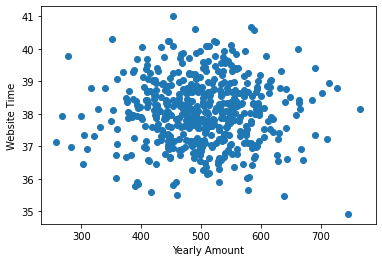

In [692]:
fig, ax = plt.subplots()
ax.scatter(data['Yearly Amount Spent'],  data['Time on Website'])

ax.set_xlabel('Yearly Amount')
ax.set_ylabel('Website Time')

plt.show()

----

**b. Yearly amount Spent vs Time on App**

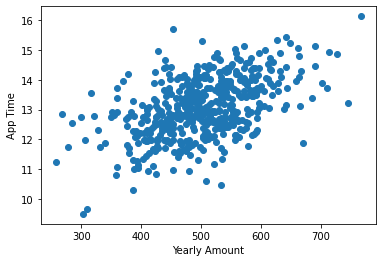

In [693]:
fig, ax = plt.subplots()
ax.scatter(data['Yearly Amount Spent'],  data['Time on App'])

ax.set_xlabel('Yearly Amount')
ax.set_ylabel('App Time')

plt.show()

----

**c. Length of membership vs Time on App**

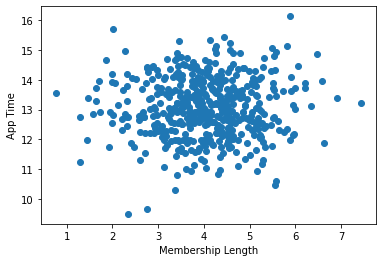

In [694]:
fig, ax = plt.subplots()
ax.scatter(data['Length of Membership'],  data['Time on App'])

ax.set_xlabel('Membership Length')
ax.set_ylabel('App Time')

plt.show()

----

**d. Generate sns pairplot. Based on the plots, what feature is mostly correlated with the yearly amount spent?**

It appears that the 'Length of Membership' feature is the most positively correlated with the 'Yearly Amount Spent' feature. 

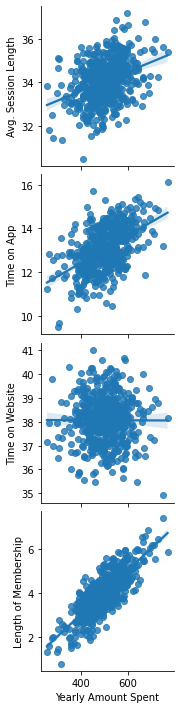

In [695]:
sns.pairplot(data=data, kind='reg', diag_kind='kde', x_vars=['Yearly Amount Spent'], y_vars=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'])
plt.show()

----

**e. Also, plot sns heatmpa based on correlation with annot=True and discuss which columns must be removed based on that and which column is mostly interesting and related to Yearly Amount Spent?**


There are some features that provide no significance/correlation to 'Yearly Amount Spent' at all, such as  'Credit Card', 'Time on Website', and 'Unnamed'. These features should be dropped.

The only feature that is strongly correlated with eachother is 'Yearly Amount Spent' and 'Length of Membership'. This is a useful relationship considering we can infer that longer memberships are positively correlated with higher yearly spending. 

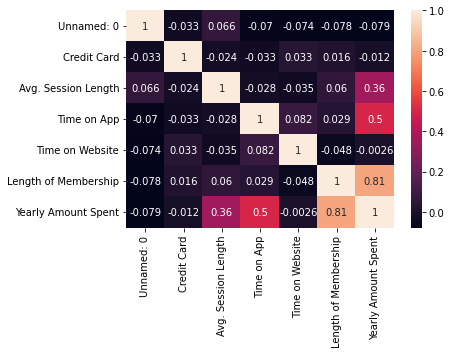

In [696]:
heatmap = sns.heatmap(data.corr(), annot=True)
plt.show()

----

**f. Generate a scatter plot with the interesting column you found in the last step against the Yearly Amount Spent**

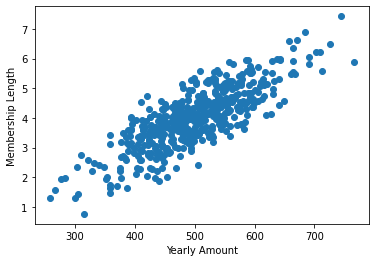

In [697]:
fig, ax = plt.subplots()
ax.scatter(data['Yearly Amount Spent'],  data['Length of Membership'])

ax.set_xlabel('Yearly Amount')
ax.set_ylabel('Membership Length')

plt.show()

----

## **2. Feature Selection and Pre-processing**

### I. Based on the EDA and null analysis, drop the unnecessary columns for the regression. 

**I will also drop non-numerical values, since they deem unnecessary to the regression. These columns are 'Email' and 'Address'**

In [698]:
data.drop(columns=['Email', 'Address', 'Credit Card', 'Unnamed: 0'], inplace=True)
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,35.497268,13.655651,40.577668,4.582621,588.951054
1,32.926272,12.109461,38.268959,3.164034,393.204933
2,34.000915,12.330278,38.110597,4.604543,488.547505
3,35.305557,14.717514,37.721283,3.620179,582.852344
4,34.330673,13.795189,38.536653,4.946308,600.406092
...,...,...,...,...,...
495,34.237660,14.566160,37.417985,4.246573,574.847438
496,35.702529,12.695736,38.190268,4.076526,530.049004
497,33.646777,12.499409,39.332576,5.458264,552.620145
498,34.322501,13.391423,37.840086,2.836485,457.469510


## **3. X/Y and Training/Test Split**

### I. Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 101 

In [699]:
X = data.drop(columns=['Yearly Amount Spent']).values
y = data['Yearly Amount Spent'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

----

### II. As we will be doing gradient descent as well as some other regression technique, scaling the data set is important. So, use sklearn's StandardScaler for scalling the X of training and test sets. But don't do it for y(target) train and test.

In [700]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.fit_transform(X_test)

## **4. Training Linear Model using SKLearn's LinearRegression**

### I. Train a linear model using Sklearn''s LinearRegression (example in the linear regression slide/colab links in webcourses)

In [701]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

-----

### II. After training, show the coefficients and intercept

In [702]:
print("Coefficients: ", lr.coef_)
print("Intercept:    ", lr.intercept_)

Coefficients:  [26.04265125 36.67425683  0.18503853 60.20236045]
Intercept:     499.7231164913068


-----

### III. Predict for the test data

In [703]:
y_pred = lr.predict(X_test_scaled)

------

### IV. Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis

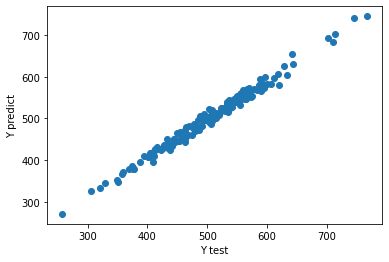

In [704]:
fig, ax = plt.subplots()
ax.scatter(y_test,  y_pred)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict')

plt.show()

-------

### V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [705]:
import sklearn.metrics as metrics

mae  = metrics.mean_absolute_error(y_test, y_pred)
mse  = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = metrics.r2_score(y_test, y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 9.369764701026478
MSE: 133.2745416560121
RMSE: 11.544459348796378
R-Squared: 0.9816395492143278


------

### VI. Interpretation: Interpret the coefficient and which coefficient belongs to which feature and based on that explain any strategy that should help the business



The coefficients seem to be related to how much correlation a feature has for the target value. The business should recognize that longer memberships relate to more money spent per year, therefor they should focus on trying to get long term customers.

## **5. Normal Equation**

### I. Implement Normal Equation and find best_theta values based on the training set

In [706]:
y_train = np.array(y_train).reshape(350, 1)
X_ones = np.ones((len(X_train_scaled), 1))
X_new_train = np.hstack((X_ones, X_train_scaled))

theta_best = np.linalg.inv(X_new_train.T.dot(X_new_train)).dot(X_new_train.T).dot(y_train)

------

### II. Display the theta values. Are they very close to the sklearn's linear regression?

Yes, they are very close to the linear regression. But the thetas are represented in exponential form, still the same as regression though.

In [707]:
print(theta_best)

[[4.99723116e+02]
 [2.60426512e+01]
 [3.66742568e+01]
 [1.85038527e-01]
 [6.02023604e+01]]


--------

### III. Prepare the test set before prediction


In [708]:
y_test = np.array(y_test).reshape(150, 1)
X_ones_test = np.ones((len(X_test_scaled), 1))
X_new_test = np.hstack((X_ones_test, X_test_scaled))

print(y_test.shape)
print(X_new_test.shape)

(150, 1)
(150, 5)


-------

### IV. Perform prediction for the test set

In [709]:
y_pred2= X_new_test.dot(theta_best)

-----

### V. Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis


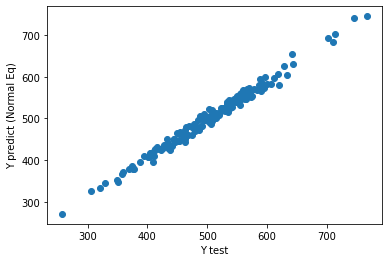

In [710]:
fig, ax = plt.subplots()
ax.scatter(y_test,  y_pred2)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (Normal Eq)')

plt.show()

------

### VI. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [711]:
mae2  = metrics.mean_absolute_error(y_test, y_pred2)
mse2  = metrics.mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2   = metrics.r2_score(y_test, y_pred2)

print("Results of sklearn.metrics:")
print("MAE:",mae2)
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R-Squared:", r2_2)

Results of sklearn.metrics:
MAE: 9.369764701026545
MSE: 133.27454165601415
RMSE: 11.544459348796467
R-Squared: 0.9816395492143275


--------

### VII. What is the limitation of using the Normal equation for regression?

A limitation of using Normal Equation for regression is is gets very computationally expensive for large number of features.

## **6. Batch Gradient Descent**


### I. Implement Batch Gradient Descent based on the way we have learned in the class (See sample code form pdf). You can play with eta and n_iterations and should set to reasonable eta and number of iterations so that you can get the thetas close to Normal equation's theta

In [712]:
cost_list = []
epoch_list = []
predicted_list = []

m = 350
eta = 0.2
n_iterations = 150
theta = np.random.randn(5,1)

X_b = X_new_train
y_b = y_train

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)
  theta = theta - eta * gradients

  y_predicted = X_b.dot(theta)
  cost = np.mean(np.square(y_b-y_predicted))

  if iteration%10 == 0:
    cost_list.append(cost)
    epoch_list.append(iteration)


-----

### II. Display the theta values. Are they very close to the sklearn's linear regression?


Yes, the values are exactly what they should be.

In [713]:
print(theta)

[[4.99723116e+02]
 [2.60426512e+01]
 [3.66742568e+01]
 [1.85038527e-01]
 [6.02023604e+01]]


-----

### III. Also plot step number (in x-axis) against the cost(y axis). 

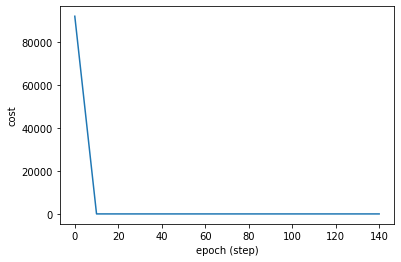

In [714]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch (step)')
plt.ylabel('cost')
plt.show()

-----

### IV. Perform Prediction for the test set


In [715]:
y_pred3 = X_new_test.dot(theta)

------

### V. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis


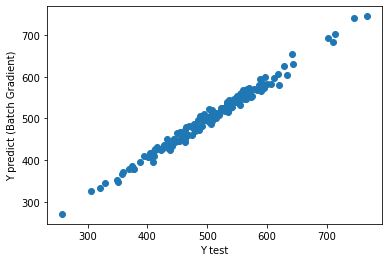

In [716]:
fig, ax = plt.subplots()
ax.scatter(y_test,  y_pred3)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (Batch Gradient)')

plt.show()

-----

### VI. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [717]:
mae3  = metrics.mean_absolute_error(y_test, y_pred3)
mse3  = metrics.mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3   = metrics.r2_score(y_test, y_pred3)

print("Results of sklearn.metrics:")
print("MAE:",mae3)
print("MSE:", mse3)
print("RMSE:", rmse3)
print("R-Squared:", r2_3)

Results of sklearn.metrics:
MAE: 9.369764701026526
MSE: 133.2745416560135
RMSE: 11.544459348796439
R-Squared: 0.9816395492143276


-----

### VII. Short Question: How do derivatives help in the process of gradient descent?

Derivatives allow us to determine whether to increase or decrease weights/functions by looking at the slope and minimize cost functions. 

-----

### VIII. Short Question: What are the benefits and the limitations of using batch gradient descent? 


Batch gradient descents are computationally efficient and stable. On the other hand, in certain cases it can converge to a model that is not the best model it can achieve. The training set may be too large.

## **8. SGDRegressor from sklearn**

## I. Use sklearn's SGDRegressor to train a model for our data set. Put a reasonable iteration and tolerance and learning steps so that we can get coefficients close to normal equation

In [718]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=275, tol=0.001, penalty=None, eta0=0.1)
sgd_reg.fit(X_train_scaled, y_train.ravel())

SGDRegressor(eta0=0.1, max_iter=275, penalty=None)

-----

## II. Display the theta values. Are they very close to sklearn's linear regression?


In [719]:
print("Coefficients: ", sgd_reg.coef_)
print("Intercept:    ", sgd_reg.intercept_)

Coefficients:  [25.17084586 36.61953402  0.63135495 59.21044684]
Intercept:     [499.84461752]


-----

## III. Predict for the test data


In [720]:
y_pred4 = sgd_reg.predict(X_test_scaled)

----

## IV. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis


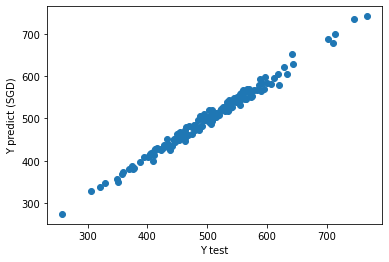

In [721]:
fig, ax = plt.subplots()
ax.scatter(y_test,  y_pred4)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (SGD)')

plt.show()

-----

## V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [722]:
mae4  = metrics.mean_absolute_error(y_test, y_pred4)
mse4  = metrics.mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
r2_4   = metrics.r2_score(y_test, y_pred4)

print("Results of sklearn.metrics:")
print("MAE:",mae4)
print("MSE:", mse4)
print("RMSE:", rmse4)
print("R-Squared:", r2_4)

Results of sklearn.metrics:
MAE: 9.574554793211473
MSE: 140.84540284794232
RMSE: 11.867830587261613
R-Squared: 0.9805965561370875


## **9. Mini-batch Gradient Descent**

### I. Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.

Mini-batch allows for a higher quality and stablegradient, it can process a lot more inputs per second which allows for faster learning.

## **10.Polynomial of degree 2**

### I. Use sklearn's Polynomial features to degree = 2 on our training and test set


In [723]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train_scaled)
X_poly_test = poly_features.fit_transform(X_test_scaled)

-----

### II. Use linearRegression on the new polynomial features

In [724]:
lr2 = LinearRegression()
lr2.fit(X_poly_train, y_train)

print(lr2.intercept_)
print(lr2.coef_)

[499.68658573]
[[ 0.00000000e+00  2.59548427e+01  3.67216721e+01  1.62102271e-01
   6.02168680e+01 -8.56590069e-01 -1.56166087e-01 -6.78266356e-02
   1.52385983e-01  3.69981677e-01 -2.06815454e-01  3.94911158e-02
   5.53534986e-01 -3.47157889e-01 -4.14356771e-02]]


-----

### III. Predict for test set

In [725]:
y_pred5 = lr2.predict(X_poly_test)

----

### IV. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis


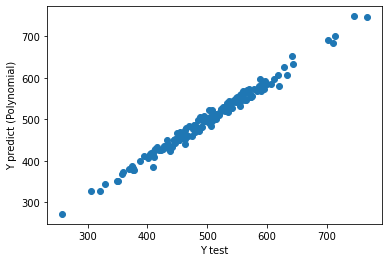

In [726]:
fig, ax = plt.subplots()
ax.scatter(y_test,  y_pred5)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (Polynomial)')

plt.show()

----

### V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [727]:
mae5  = metrics.mean_absolute_error(y_test, y_pred5)
mse5  = metrics.mean_squared_error(y_test, y_pred5)
rmse5 = np.sqrt(mse5)
r2_5   = metrics.r2_score(y_test, y_pred5)

print("Results of sklearn.metrics:")
print("MAE:",mae5)
print("MSE:", mse5)
print("RMSE:", rmse5)
print("R-Squared:", r2_5)

Results of sklearn.metrics:
MAE: 9.440016672409259
MSE: 137.6796224430069
RMSE: 11.733696026530042
R-Squared: 0.9810326871085456


## **11.Polynomial of degree 3**

### I. Use sklearn's Polynomial features to degree = 3 on our training and test set


In [728]:
from sklearn.preprocessing import PolynomialFeatures

poly_features3 = PolynomialFeatures(degree=3)
X_poly_train3 = poly_features.fit_transform(X_train_scaled)
X_poly_test3 = poly_features.fit_transform(X_test_scaled)

----

### II. Use linearRegression on the new polynomial features

In [729]:
lr3 = LinearRegression()
lr3.fit(X_poly_train3, y_train)

print(lr3.intercept_)
print(lr3.coef_)

[499.68658573]
[[ 0.00000000e+00  2.59548427e+01  3.67216721e+01  1.62102271e-01
   6.02168680e+01 -8.56590069e-01 -1.56166087e-01 -6.78266356e-02
   1.52385983e-01  3.69981677e-01 -2.06815454e-01  3.94911158e-02
   5.53534986e-01 -3.47157889e-01 -4.14356771e-02]]


-----

### III. Predict for test set

In [730]:
y_pred6 = lr3.predict(X_poly_test3)

-----

### IV. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis


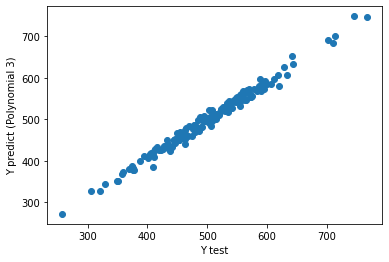

In [743]:
fig, ax = plt.subplots()
ax.scatter(y_test,  y_pred6)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (Polynomial 3)')

plt.show()

-------

### V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [732]:
mae6  = metrics.mean_absolute_error(y_test, y_pred6)
mse6  = metrics.mean_squared_error(y_test, y_pred6)
rmse6 = np.sqrt(mse6)
r2_6  = metrics.r2_score(y_test, y_pred6)

print("Results of sklearn.metrics:")
print("MAE:",mae6)
print("MSE:", mse6)
print("RMSE:", rmse6)
print("R-Squared:", r2_6)

Results of sklearn.metrics:
MAE: 9.440016672409259
MSE: 137.6796224430069
RMSE: 11.733696026530042
R-Squared: 0.9810326871085456


## **12. Learning Curve**


### I. Generate learning curve with linearRegression


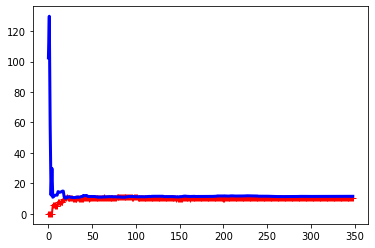

In [733]:
train_errors = []
val_errors = []
lr4 = LinearRegression()


for m in range(1, len(X_train_scaled)):
  lr4.fit(X_train_scaled[:m], y_train[:m])

  y_train_pred = lr4.predict(X_train_scaled[:m])
  y_test_predict = lr4.predict(X_test_scaled)

  train_errors.append(metrics.mean_squared_error(y_train[:m], y_train_pred))
  val_errors.append(metrics.mean_squared_error(y_test, y_test_predict))


plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train')
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Test')
plt.show()

-----

### II. Generate learning curve with polynomial regression with degree  = 5


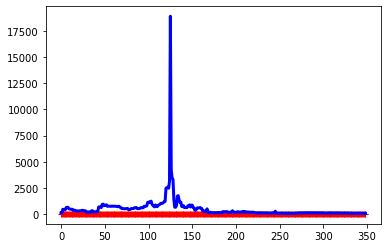

In [734]:
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([('poly_features', PolynomialFeatures(degree=5)),
                     ('lin_reg', LinearRegression())])

train_errors2 = []
val_errors2 = []


for m in range(1, len(X_train_scaled)):
  poly_reg.fit(X_train_scaled[:m], y_train[:m])

  y_train_pred2 = poly_reg.predict(X_train_scaled[:m])
  y_test_predict2 = poly_reg.predict(X_test_scaled)

  train_errors2.append(metrics.mean_squared_error(y_train[:m], y_train_pred2))
  val_errors2.append(metrics.mean_squared_error(y_test, y_test_predict2))


plt.plot(np.sqrt(train_errors2), 'r-+', linewidth=2, label='Train')
plt.plot(np.sqrt(val_errors2), 'b-', linewidth=3, label='Test')
plt.show()


-----

### III. Interpret the result

In the Linear Regression Learning Curve, the model is overfit. Both curves reach a plateau and almost touching.

In the Polynomial Feature Learning Curve is underfit. The model has relatively low error on training examples, but high error on unseen data.

## **13. Regularization**

### I. Explain the purpose of regularization

The purpose of regularization is to reduce the error by fitting a function and avoid overfitting.


## **14. Ridge Regression**


### I. Use sklearn's Ridge to train the data set (use the polynomial degree 3 data set)


In [735]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_poly_train3, y_train)

Ridge(alpha=1, solver='cholesky')

-----

### II. Predict for test set


In [736]:
y_pred7 = ridge_reg.predict(X_poly_test3)

-----

### III. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis


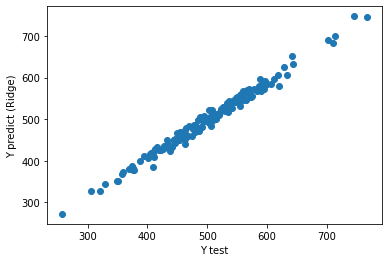

In [744]:
fig, ax = plt.subplots()
ax.scatter(y_test,  y_pred7)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (Ridge)')

plt.show()

----

### IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)


In [738]:
mae7  = metrics.mean_absolute_error(y_test, y_pred7)
mse7  = metrics.mean_squared_error(y_test, y_pred7)
rmse7 = np.sqrt(mse7)
r2_7  = metrics.r2_score(y_test, y_pred7)

print("Results of sklearn.metrics:")
print("MAE:",mae7)
print("MSE:", mse7)
print("RMSE:", rmse7)
print("R-Squared:", r2_7)

Results of sklearn.metrics:
MAE: 9.518664689381286
MSE: 140.11522487878702
RMSE: 11.837027704571238
R-Squared: 0.980697148467032


## **14. Ridge Regression**

### I. Use sklearn's SGDRegressor for Ridge Regression


In [739]:
sgd_reg2 = SGDRegressor(penalty='l2')
sgd_reg2.fit(X_poly_train3, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

-----

### II. Predict for test set


In [747]:
y_pred8 = sgd_reg2.predict(X_poly_test3)

-----

### III. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis


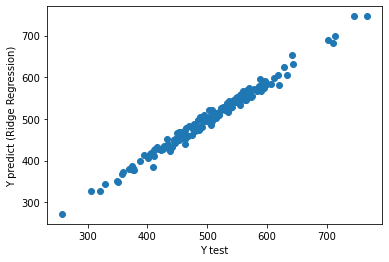

In [748]:
fig, ax = plt.subplots()
ax.scatter(y_test,  y_pred8)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (Ridge Regression)')

plt.show()

-----

### IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)


In [749]:
mae8  = metrics.mean_absolute_error(y_test, y_pred8)
mse8  = metrics.mean_squared_error(y_test, y_pred8)
rmse8 = np.sqrt(mse8)
r2_8  = metrics.r2_score(y_test, y_pred8)

print("Results of sklearn.metrics:")
print("MAE:",mae8)
print("MSE:", mse8)
print("RMSE:", rmse8)
print("R-Squared:", r2_8)

Results of sklearn.metrics:
MAE: 9.46352107282144
MSE: 138.47566258730168
RMSE: 11.767568252927267
R-Squared: 0.9809230213335887


## **16. Lasso Regression**

### I. Use sklearn's Lasso


In [751]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly_train3, y_train)

Lasso(alpha=0.1)

-----

### II. Predict for test set


In [752]:
lasso_pred = lasso_reg.predict(X_poly_test3)

-----

### III. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis


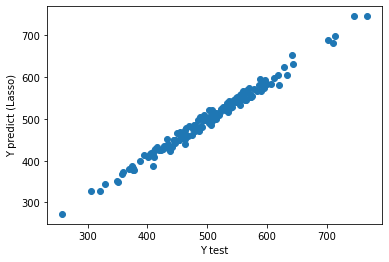

In [753]:
fig, ax = plt.subplots()
ax.scatter(y_test,  lasso_pred)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (Lasso)')

plt.show()

-----

### IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)


In [755]:
mae9  = metrics.mean_absolute_error(y_test, lasso_pred)
mse9  = metrics.mean_squared_error(y_test, lasso_pred)
rmse9 = np.sqrt(mse9)
r2_9  = metrics.r2_score(y_test, lasso_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae9)
print("MSE:", mse9)
print("RMSE:", rmse9)
print("R-Squared:", r2_9)

Results of sklearn.metrics:
MAE: 9.502028791362806
MSE: 139.2015737462109
RMSE: 11.798371656555446
R-Squared: 0.9808230168170297


----

### V. How Lasso perform the regularization and how does that affect the thetas?


The Lasso adds penalty equal to the absolute value of the magnetude of coefficient. It shrinks the weight of the least important features, which is how it affects the thetas.

## **17. Elastic Net**

### I. Use sklearn's ElasticNet


In [756]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly_train3, y_train)

ElasticNet(alpha=0.1)

-----

### II. Predict for test set


In [757]:
elastic_pred = elastic_net.predict(X_poly_test3)

-----

### III. Generate a scatter plot that shows the Y test in x axis and y predicted in y axis


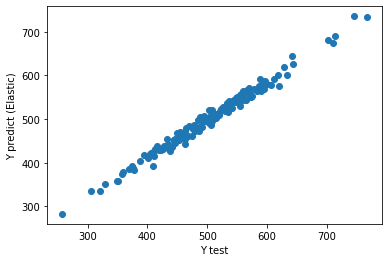

In [759]:
fig, ax = plt.subplots()
ax.scatter(y_test,  elastic_pred)

ax.set_xlabel('Y test')
ax.set_ylabel('Y predict (Elastic)')

plt.show()

-----

### IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE and R^2  (see documentation of sklearn's metrics)


In [760]:
mae0  = metrics.mean_absolute_error(y_test, elastic_pred)
mse0  = metrics.mean_squared_error(y_test, elastic_pred)
rmse0 = np.sqrt(mse0)
r2_0  = metrics.r2_score(y_test, elastic_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae0)
print("MSE:", mse0)
print("RMSE:", rmse0)
print("R-Squared:", r2_0)

Results of sklearn.metrics:
MAE: 11.173076285299413
MSE: 193.64934999462295
RMSE: 13.915794982487451
R-Squared: 0.9733220664946606


-----

### V. How ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?


Elastic net performs regularization by combining characteristics of both lasso and ridge. If a feature of a group has a strong relationship with the dependent variable, it will include the group in the model tuning since ommitting other variables may result in losing information. 